In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow import keras
from tensorflow.keras import layers, Sequential


tf.keras.backend.clear_session()

In [305]:
spine_data = pd.read_csv("./data/Dataset_spine.csv")

spine_data.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [306]:
spine_data = spine_data.drop("Unnamed: 13", axis=1)

names=["pelvic_incidence","pelvic tilt","lumbar_lordosis_angle","sacral_slope","pelvic_radius","degree_spondylolisthesis",
                                                                                               "pelvic_slope",
                                                                                               "direct_tilt",
                                                                                               "thoracic_slope",
                                                                                               "cervical_tilt",
                                                                                               "sacrum_angle",
                                                                                               "scoliosis_slope",
                                                                                                "class_attr"]

spine_data.columns = names

spine_data.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class_attr
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


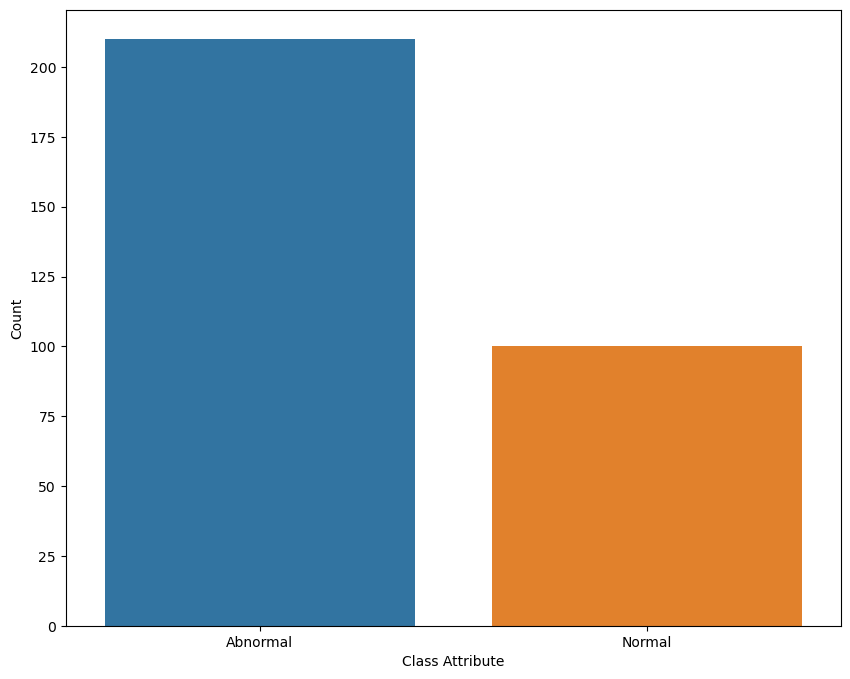

In [307]:
import seaborn as sns

plt.figure(figsize=[10,8])

sns.countplot(data=spine_data, x="class_attr")

plt.xlabel("Class Attribute")
plt.ylabel("Count")

plt.show()

In [308]:
features = spine_data.drop("class_attr", axis=1)

target = spine_data[["class_attr"]]

In [309]:
target.shape 

(310, 1)

In [310]:
features.shape

(310, 12)

In [311]:
label_bin = LabelBinarizer()

processed_target = pd.DataFrame(data=label_bin.fit_transform(target),
                               columns=target.columns,
                               index= target.index)

processed_target.sample(10)

,class_attr
137,0
288,1
253,1
143,0
0,0
224,1
181,0
226,1
112,0
217,1


In [312]:
label_bin.classes_

array(['Abnormal', 'Normal'], dtype='<U8')

In [313]:
sc = StandardScaler()

processed_features = pd.DataFrame(data=sc.fit_transform(features), 
                                 columns=features.columns,
                                 index=features.index)

processed_features.sample(10)

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
118,0.292837,0.661985,-0.332311,-0.117548,1.392886,-0.264508,-0.333988,0.434234,0.210825,0.936591,-0.151149,-0.586195
171,1.040439,-0.350330,1.498767,1.597229,-0.991993,-0.370785,1.294309,1.003907,-1.753275,0.444214,-1.283209,-0.625779
140,0.526875,-0.214336,1.215042,0.836367,-0.966713,0.090791,-1.646397,-0.923094,1.532423,1.194177,0.946162,-1.091702
267,-0.443638,-0.813882,-0.266835,0.037161,0.388886,-0.651762,-0.862735,0.065246,0.662092,0.686034,-1.471480,-0.769860
33,-1.268742,-0.455995,-0.644076,-1.289191,0.525987,-0.629192,1.202004,1.029853,-1.631038,-0.917756,0.920492,0.562919
46,-0.706853,0.468863,-0.850186,-1.257252,-0.040315,-0.528422,-1.439418,0.258800,-0.580489,0.421452,0.807225,-0.537795
29,0.370891,0.735493,-0.143183,-0.072128,-0.334212,-0.754768,0.715984,-1.031181,-1.418589,-1.504357,0.826633,0.164153
62,-0.927880,-0.811594,0.003729,-0.586356,1.262881,0.074933,-1.248933,0.085013,0.204756,1.677540,0.565849,-1.162741
284,-0.077231,-0.298241,-0.471373,0.123198,0.234282,-0.625792,0.774296,0.411928,0.494601,-1.352006,-1.605569,-0.856512
201,0.407724,1.574509,2.394292,-0.650406,2.081876,1.653532,0.358304,-1.414394,1.844158,-0.217122,0.863012,0.247067


In [314]:
processed_features.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,-9.168293e-17,1.001617,-1.996010,-0.817398,-0.104925,0.719464,4.029206
pelvic tilt,310.0,1.833659e-16,1.001617,-2.411664,-0.688114,-0.118606,0.458116,3.191402
lumbar_lordosis_angle,310.0,1.375244e-16,1.001617,-2.047652,-0.806027,-0.127862,0.597549,3.984615
sacral_slope,310.0,-1.031433e-16,1.001617,-2.207741,-0.716842,-0.040960,0.726941,5.855771
pelvic_radius,310.0,4.354939e-16,1.001617,-3.597963,-0.542383,0.026138,0.567621,3.395818
degree_spondylolisthesis,310.0,1.833659e-16,1.001617,-0.996172,-0.658507,-0.387450,0.399768,10.460350
pelvic_slope,310.0,3.151601e-17,1.001617,-1.646397,-0.871329,0.010547,0.812640,1.842974
direct_tilt,310.0,8.308766e-17,1.001617,-1.657245,-0.958454,0.067895,0.884884,1.788002
thoracic_slope,310.0,2.578583e-16,1.001617,-1.775578,-0.779769,-0.037140,0.832300,1.844158
cervical_tilt,310.0,-4.469543e-16,1.001617,-1.697267,-0.828145,0.007103,0.844180,1.692090


In [315]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(processed_features,
                                                   processed_target,
                                                   test_size=0.2,
                                                   random_state=10)

x_train.shape, y_train.shape

((248, 12), (248, 1))

In [316]:
x_test.shape, y_test.shape

((62, 12), (62, 1))

In [317]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train,
                                                     y_train,
                                                     test_size=0.15,
                                                     random_state=10)

x_train.shape, y_train.shape

((210, 12), (210, 1))

In [318]:
x_valid.shape, y_valid.shape

((38, 12), (38, 1))

In [328]:
def build_model_compile():
    inputs = tf.keras.Input(shape=(x_train.shape[1],))
    
    x = layers.Dense(units=10, activation="relu")(inputs)
    
    predicted_output = layers.Dense(units=1, activation="sigmoid")(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=predicted_output)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 loss=tf.keras.losses.BinaryCrossentropy(),
                 metrics=["accuracy",
                         tf.keras.metrics.Precision(0.5),
                         tf.keras.metrics.Recall(0.5)])
    return model

In [329]:
spine_model = build_model_compile()

spine_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense_2 (Dense)             (None, 10)                130       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 141 (564.00 Byte)
Trainable params: 141 (564.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


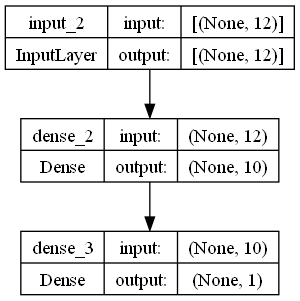

In [330]:
tf.keras.utils.plot_model(spine_model, show_shapes=True, to_file="spine_model.png")

In [331]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))

train_dataset = train_dataset.batch(16)

train_dataset.shuffle(128)

<_ShuffleDataset element_spec=(TensorSpec(shape=(None, 12), dtype=tf.float64, name=None), TensorSpec(shape=(None, 1), dtype=tf.int32, name=None))>

In [332]:
valid_dataset = tf.data.Dataset.from_tensor_slices((x_valid, y_valid))

valid_dataset = valid_dataset.batch(16)

In [333]:
num_epochs = 100

training_history = spine_model.fit(train_dataset, epochs=num_epochs, validation_data=valid_dataset)

Epoch 1/100
14/14 [==============================] - 1s 32ms/step - loss: 0.9137 - accuracy: 0.3619 - precision_1: 0.2707 - recall_1: 0.4932 - val_loss: 1.0706 - val_accuracy: 0.2632 - val_precision_1: 0.1481 - val_recall_1: 0.4444
Epoch 2/100
14/14 [==============================] - 0s 16ms/step - loss: 0.8785 - accuracy: 0.3857 - precision_1: 0.2879 - recall_1: 0.5205 - val_loss: 1.0291 - val_accuracy: 0.2895 - val_precision_1: 0.1538 - val_recall_1: 0.4444
Epoch 3/100
14/14 [==============================] - 0s 17ms/step - loss: 0.8482 - accuracy: 0.4000 - precision_1: 0.2977 - recall_1: 0.5342 - val_loss: 0.9914 - val_accuracy: 0.2895 - val_precision_1: 0.1538 - val_recall_1: 0.4444
Epoch 4/100
14/14 [==============================] - 0s 16ms/step - loss: 0.8209 - accuracy: 0.4286 - precision_1: 0.3206 - recall_1: 0.5753 - val_loss: 0.9571 - val_accuracy: 0.3684 - val_precision_1: 0.2000 - val_recall_1: 0.5556
Epoch 5/100
14/14 [==============================] - 0s 16ms/step - loss

14/14 [==============================] - 0s 17ms/step - loss: 0.4537 - accuracy: 0.8143 - precision_1: 0.7500 - recall_1: 0.6986 - val_loss: 0.4712 - val_accuracy: 0.8158 - val_precision_1: 0.5833 - val_recall_1: 0.7778
Epoch 37/100
14/14 [==============================] - 0s 16ms/step - loss: 0.4499 - accuracy: 0.8143 - precision_1: 0.7500 - recall_1: 0.6986 - val_loss: 0.4666 - val_accuracy: 0.8158 - val_precision_1: 0.5833 - val_recall_1: 0.7778
Epoch 38/100
14/14 [==============================] - 0s 20ms/step - loss: 0.4463 - accuracy: 0.8190 - precision_1: 0.7536 - recall_1: 0.7123 - val_loss: 0.4622 - val_accuracy: 0.7895 - val_precision_1: 0.5385 - val_recall_1: 0.7778
Epoch 39/100
14/14 [==============================] - 0s 18ms/step - loss: 0.4428 - accuracy: 0.8190 - precision_1: 0.7536 - recall_1: 0.7123 - val_loss: 0.4582 - val_accuracy: 0.7895 - val_precision_1: 0.5385 - val_recall_1: 0.7778
Epoch 40/100
14/14 [==============================] - 0s 17ms/step - loss: 0.4395

14/14 [==============================] - 0s 18ms/step - loss: 0.3627 - accuracy: 0.8571 - precision_1: 0.8028 - recall_1: 0.7808 - val_loss: 0.3891 - val_accuracy: 0.7895 - val_precision_1: 0.5385 - val_recall_1: 0.7778
Epoch 72/100
14/14 [==============================] - 0s 18ms/step - loss: 0.3605 - accuracy: 0.8571 - precision_1: 0.8028 - recall_1: 0.7808 - val_loss: 0.3880 - val_accuracy: 0.7895 - val_precision_1: 0.5385 - val_recall_1: 0.7778
Epoch 73/100
14/14 [==============================] - 0s 18ms/step - loss: 0.3583 - accuracy: 0.8571 - precision_1: 0.8028 - recall_1: 0.7808 - val_loss: 0.3869 - val_accuracy: 0.7895 - val_precision_1: 0.5385 - val_recall_1: 0.7778
Epoch 74/100
14/14 [==============================] - 0s 19ms/step - loss: 0.3562 - accuracy: 0.8571 - precision_1: 0.8028 - recall_1: 0.7808 - val_loss: 0.3860 - val_accuracy: 0.7895 - val_precision_1: 0.5385 - val_recall_1: 0.7778
Epoch 75/100
14/14 [==============================] - 0s 19ms/step - loss: 0.3540

In [334]:
training_history.history.keys()

dict_keys(['loss', 'accuracy', 'precision_1', 'recall_1', 'val_loss', 'val_accuracy', 'val_precision_1', 'val_recall_1'])

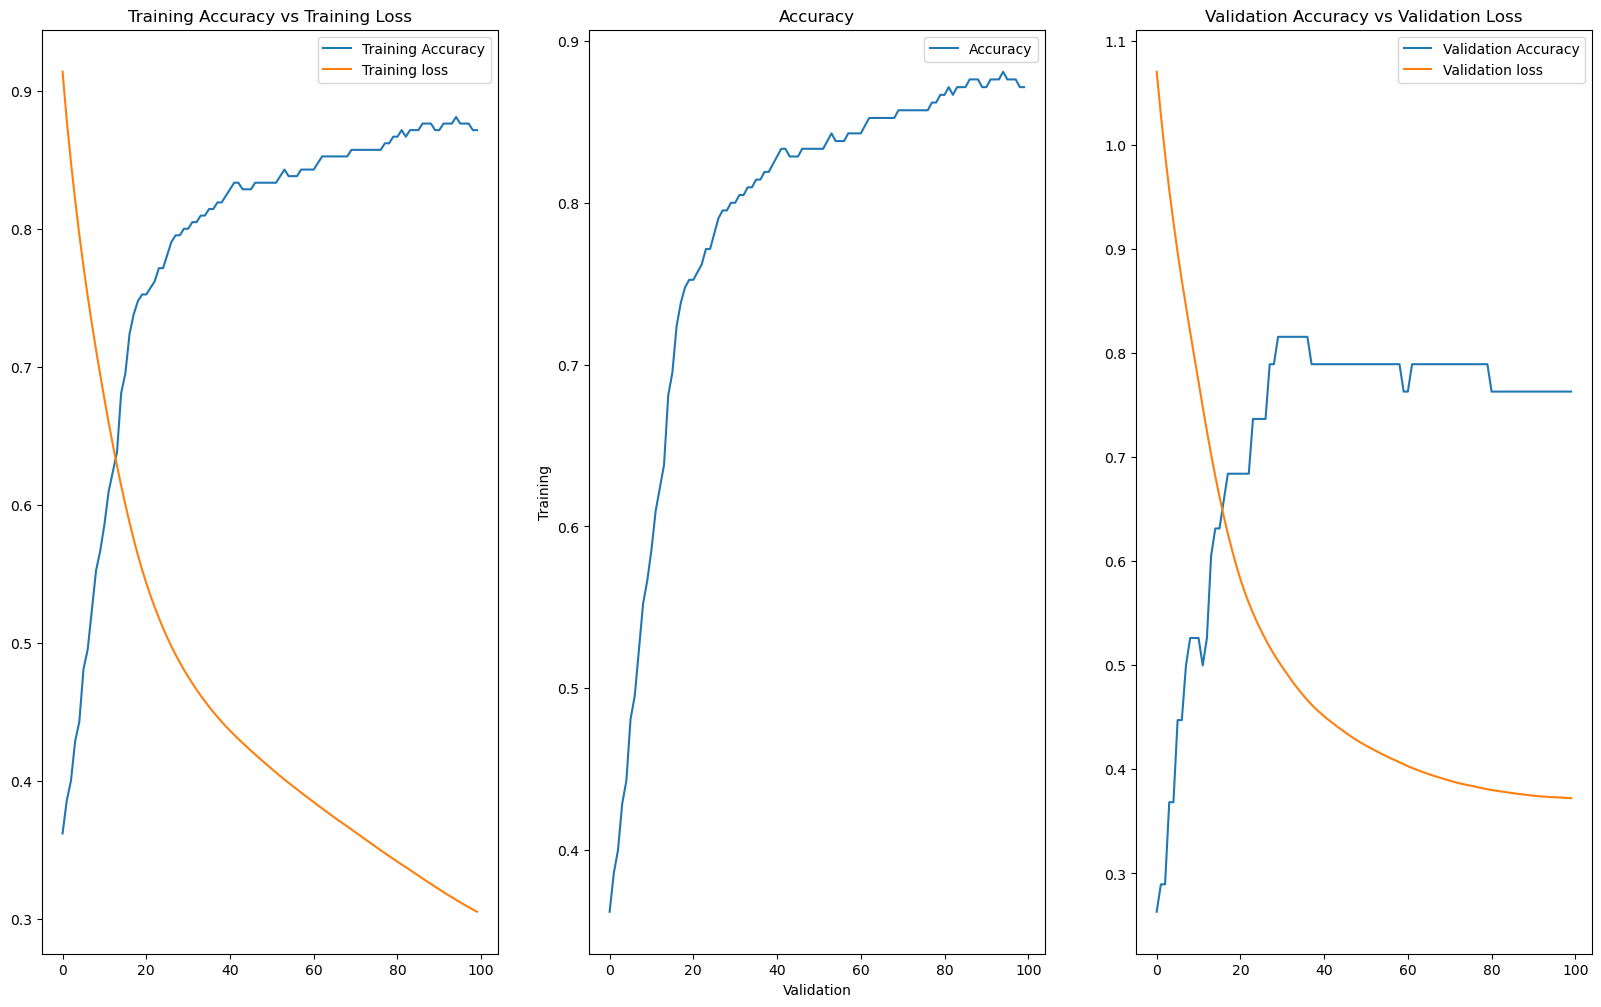

In [335]:
training_accuracy = training_history.history["accuracy"]
training_loss = training_history.history["loss"]

validation_accuracy = training_history.history["val_accuracy"]
validation_loss = training_history.history["val_loss"]

plt.figure(figsize=[20, 12])

plt.subplot(1, 3, 1)

plt.plot(range(num_epochs), training_accuracy, label="Training Accuracy")
plt.plot(range(num_epochs), training_loss, label="Training loss")
plt.title("Training Accuracy vs Training Loss")
plt.legend()

plt.subplot(1, 3, 2)

plt.plot(range(len(validation_accuracy)),training_accuracy, label="Accuracy")
plt.xlabel("Validation")
plt.ylabel("Training")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 3, 3)

plt.plot(range(num_epochs), validation_accuracy, label="Validation Accuracy")
plt.plot(range(num_epochs), validation_loss, label="Validation loss")
plt.title("Validation Accuracy vs Validation Loss")
plt.legend()

plt.show()

In [336]:
score = spine_model.evaluate(x_test, y_test)

score_df = pd.Series(data=score, index=spine_model.metrics_names)

score_df

2/2 [==============================] - 0s 8ms/step - loss: 0.4200 - accuracy: 0.8387 - precision_1: 0.7222 - recall_1: 0.7222


loss           0.420000
accuracy       0.838710
precision_1    0.722222
recall_1       0.722222
dtype: float64

In [337]:
y_pred = spine_model.predict(x_test)

y_pred[:10]

2/2 [==============================] - 0s 0s/step


array([[0.32343748],
       [0.9368861 ],
       [0.00310496],
       [0.90389025],
       [0.79263943],
       [0.4659287 ],
       [0.8001054 ],
       [0.53291255],
       [0.510206  ],
       [0.17799912]], dtype=float32)

In [338]:
y_pred = np.where(y_pred >= 0.5, 1, y_pred)
y_pred = np.where(y_pred < 0.5, 0, y_pred)

y_pred[:10]

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [339]:
accuracy_score(y_test, y_pred)

0.8387096774193549

In [341]:
print(classification_report(y_test, y_pred, target_names=label_bin.classes_))

              precision    recall  f1-score   support

    Abnormal       0.89      0.89      0.89        44
      Normal       0.72      0.72      0.72        18

    accuracy                           0.84        62
   macro avg       0.80      0.80      0.80        62
weighted avg       0.84      0.84      0.84        62



In [343]:
print(confusion_matrix(y_test, y_pred))

[[39  5]
 [ 5 13]]


In [349]:
predicted_data = pd.DataFrame({"y_true": y_test.values.flatten(),
                              "y_pred": y_pred.flatten()}, index=range(len(y_pred)))

predicted_data.sample(10)

,y_true,y_pred
4,1,1.0
38,0,1.0
46,1,0.0
6,0,1.0
33,1,0.0
27,0,0.0
32,0,0.0
19,1,1.0
43,1,1.0
42,0,0.0
